# Top 100 Canadian beers

- Vrbic, Zanini, Reiner


In [1]:
## Initialize dataset
import pandas as pd 

beers = pd.read_csv('canadian_beers.csv')

beers.head()

,Unnamed: 0,rank,name,brewery,style,abv,score,ratings
0,0,1,Péché Mortel,Brasserie Dieu du Ciel!,American Double / Imperial Stout,9.5,4.39,5087
1,1,2,Péché Mortel En Fût De Bourbon Américain,Brasserie Dieu du Ciel!,American Double / Imperial Stout,9.5,4.45,488
2,2,3,La Fin Du Monde,Unibroue,Tripel,9.0,4.31,10021
3,3,4,Unibroue 17 Grande Réserve,Unibroue,Belgian Strong Dark Ale,10.0,4.24,1140
4,4,5,Fat Tug IPA,Driftwood Brewery,American IPA,7.0,4.25,601


## Aus welchen Beobachtungen setzen sich die Daten zusammen? Beschreiben Sie diese kurz und überlegen Sie sich, welches Skalenniveau die einzelnen Beobachtungen haben. [2]

### Dieses dataset besteht aus einer Liste der Top 100 kanadischen Biere:

- Rank: rank, from 1 to 100, as rated by BeerAdvocate.com users (Integer 0 -100)
- Name: name of the beer (String)
- Brewery: the brewery responsible for this delicious creation (String)
- Style: the style of the beer (String)
- ABV: Alcohol by Volume (Float, %, 0% - 15%)
- Score: Overall score determined by BeerAdvocate.com users (Integer 1 - 5)
- Ratings: Number of ratings (Integer 0 - 11000)


In [2]:
rmax = beers['rank'].max()
abvmax = beers['abv'].max()
smax = beers['score'].max()
ramax = beers['ratings'].max()
print(f" rank: {rmax}\n abv: {abvmax}\n score: {smax}\n ratings: {ramax}")

 rank: 100
 abv: 12.2
 score: 4.48
 ratings: 10021


## Wie setzen sich die einzelnen Beobachtungen zusammen? Verwenden Sie Methoden für univariate Datensätze sinnvoll. [3]

- TODO

## Ermitteln Sie Kennzahlen für die einzelnen Beobachtungen, die Ihnen sinnvoll erscheinen. (Lokation, Modus, Varianzen, Quantile…) [2]

- TODO

In [3]:
## Ermitteln Sie die 3 häufigsten Brauereien und Bier Arten, die in diesem Datensatz vorkommen.

top3breweries = beers.groupby(['brewery']).size().sort_values(ascending=False).head(3).index
top3styles = beers.groupby(['style']).size().sort_values(ascending=False).head(3).index

print(f"Brauereien:\n", top3breweries, "\n\nArten:\n", top3styles)

# oder beides?
#beers.groupby(['brewery', 'style']).size().sort_values(ascending=False).head(3)


Brauereien:
 Index(['Brasserie Dieu du Ciel!', 'Bellwoods Brewery', 'Driftwood Brewery'], dtype='object', name='brewery') 

Arten:
 Index(['American IPA', 'American Double / Imperial IPA',
       'Russian Imperial Stout'],
      dtype='object', name='style')


In [4]:
### Wie verteilen sich Rang und Score auf diese Brauereien und Arten von Bier?

rows_breweries = beers.loc[beers['brewery'].isin(top3breweries)]
rows_breweries.groupby('brewery')[['rank', 'score']].describe()

# Bellwoods Brewery

rank                                                \
                        count     mean        std   min    25%   50%    75%   
brewery                                                                       
Bellwoods Brewery        10.0  49.4000  17.011107  17.0  37.75  51.5  60.25   
Brasserie Dieu du Ciel!  16.0  48.1875  35.427332   1.0  11.75  49.5  76.00   
Driftwood Brewery        10.0  46.6000  30.015552   5.0  26.00  37.5  73.25   

                               score                                           \
                           max count      mean       std   min     25%    50%   
brewery                                                                         
Bellwoods Brewery         72.0  10.0  4.196000  0.077488  4.10  4.1400  4.200   
Brasserie Dieu du Ciel!  100.0  16.0  4.140625  0.157076  3.91  4.0275  4.115   
Driftwood Brewery         89.0  10.0  4.188000  0.116123  4.01  4.0975  4.200   

                                       
                            75%   max  
brewery                                
Bellwoods Brewery        4.2250  4.34  
Brasserie Dieu du Ciel!  4.2450  4.45  
Driftwood Brewery        4.2575  4.36

In [5]:
rows_styles = beers.loc[beers['style'].isin(top3styles)]
rows_styles.groupby('style')[['rank', 'score']].describe()

# American IPA

rank                                           \
                               count       mean        std   min    25%   50%   
style                                                                           
American Double / Imperial IPA  13.0  63.076923  20.710149  27.0  51.00  66.0   
American IPA                    18.0  43.222222  29.997168   5.0  19.50  41.0   
Russian Imperial Stout          10.0  47.700000  30.262004  17.0  25.25  41.0   

                                            score                            \
                                  75%   max count      mean       std   min   
style                                                                         
American Double / Imperial IPA  76.00  95.0  13.0  4.116923  0.061831  4.01   
American IPA                    69.25  90.0  18.0  4.176111  0.111310  3.95   
Russian Imperial Stout          57.50  99.0  10.0  4.169000  0.120227  3.98   

                                                            
                                  25%    50%     75%   max  
style                                                       
American Double / Imperial IPA  4.070  4.120  4.1600  4.24  
American IPA                    4.110  4.180  4.2575  4.36  
Russian Imperial Stout          4.065  4.205  4.2250  4.34

### Das Bier welcher Brauerei und welcher Art würden Sie jemandem empfehlen, wenn Sie sich nach dem Score richten? (Betrachten Sie hier nur die 3 häufigsten Arten) [3]

- Brauerei: Bellwoods Brewery (höchster mean Wert)
- Art: American IPA (höchster mean Wert)

In [6]:
## Fügen Sie eine Variable ein, die anzeigt, ob es sich um ein american style beer handelt (Tipp: beerstyle). Wie siehen scores und rank in diesem Fall aus? [3]

for index, row in beers.iterrows():
    new_style_value = "No"

    if row['style'].lower().find('american') == 0:        
        new_style_value = "Yes"
    
    beers.at[index, "american"] = new_style_value

beers.tail()

,Unnamed: 0,rank,name,brewery,style,abv,score,ratings,american
95,95,96,Red Racer Gingerhead Gingerbread Stout,Central City Brewers + Distillers,Irish Dry Stout,6.0,4.04,84,No
96,96,97,Solstice D'hiver,Brasserie Dieu du Ciel!,American Barleywine,10.2,3.91,921,Yes
97,97,98,"Long, Dark Voyage To Uranus",Sawdust City Brewing Co.,Russian Imperial Stout,8.5,4.04,83,No
98,98,99,Amsterdam Tempest Imperial Stout,Amsterdam Brewing Company,Russian Imperial Stout,9.0,3.98,138,No
99,99,100,Rigor Mortis Abt,Brasserie Dieu du Ciel!,Quadrupel (Quad),10.5,3.91,759,No


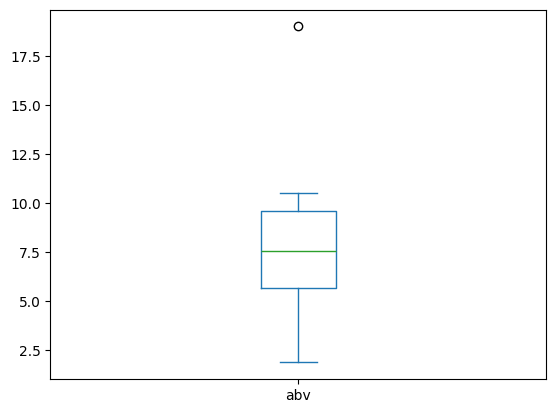

In [17]:
## Untersuchen Sie die Unterschiede zwischen ‘Ale’ und ‘Stout’ Bieren. [5]

# Ale
# ale_statsis = beers[beers['style'].str.contains('ale', case=False)].describe()
# ale_statsis.plot.bar()

beers[beers['style'].str.contains('ale', case=False)]['abv'].describe(include='all').plot.box()

ale_abv = beers[beers['style'].str.contains('ale', case=False)]['abv'].describe(include='all').loc['mean']
ale_score = beers[beers['style'].str.contains('ale', case=False)]['score'].describe(include='all').loc['mean']



<Axes: >

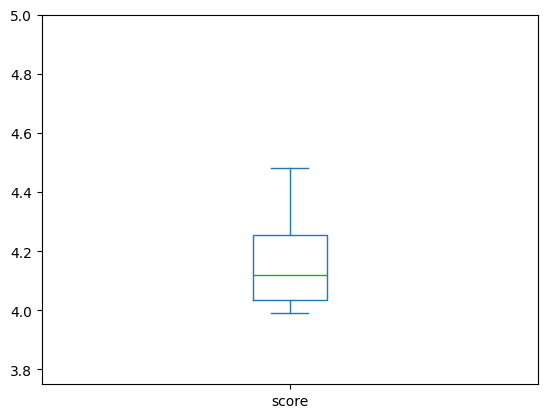

In [33]:
beers[beers['style'].str.contains('ale', case=False)]['score'].describe(include='all').plot.box(ylim=(3.75, 5))

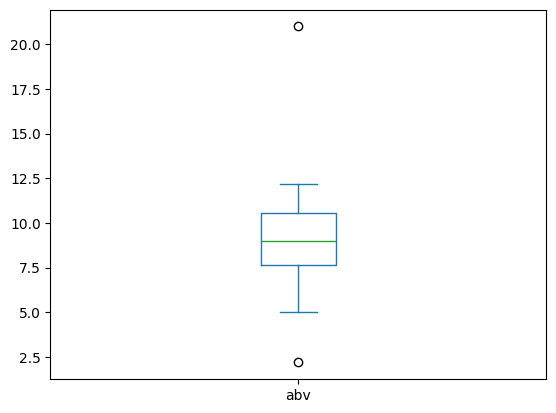

In [13]:
# Stout

# beers[beers['style'].str.contains('stout', case=False)].describe()

beers[beers['style'].str.contains('stout', case=False)]['abv'].describe(include='all').plot.box()

stout_abv = beers[beers['style'].str.contains('stout', case=False)]['abv'].describe(include='all').loc['mean']
stout_score = beers[beers['style'].str.contains('stout', case=False)]['score'].describe(include='all').loc['mean']

<Axes: >

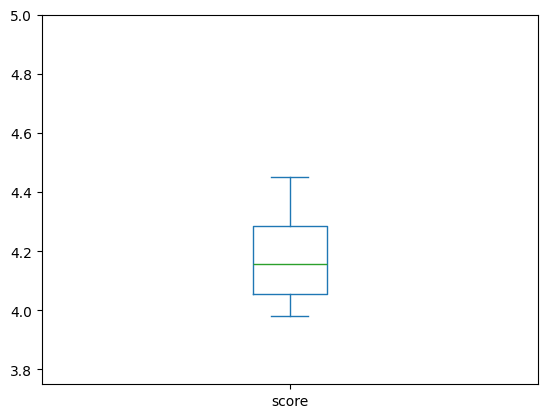

In [34]:
beers[beers['style'].str.contains('stout', case=False)]['score'].describe(include='all').plot.box(ylim=(3.75, 5))



In [35]:
from scipy.stats import pearsonr

mean_pr = pearsonr([ale_abv, stout_abv], [ale_score, stout_score])
print("R_mean: " + str(mean_pr[0]))

R_mean: 1.0


In [36]:
all_pr = pearsonr(beers['abv'], beers['score'])
print("R_all: " + str(all_pr[0]))

R_all: 0.1131201200819268
